# **Guided Project Clean And Analyze Employee Exit Surveys **

We've accomplished a lot so far in this course and now it's time to put our data cleaning skills to work!

Working on guided projects gives you hands on experience with real world examples, which also means they'll be more challenging than missions. However, keep in mind that now you have more tools you can use to clean and transform data than you did at the beginning of this course, including:

Vectorized string methods to clean string columns
The apply(), map(), and applymap() methods to transform data
The fillna(), dropna(), and drop() methods to drop missing or unnecessary values
The melt() function to reshape data
The concat() and merge() functions to combine data
If you get stuck, don't be afraid to:

Review previous missions.
Use Google and StackOverflow to search for answers.
It's very difficult to understand every concept and memorize syntax the first time you complete a course, so don't be discouraged if you need to review missions again or use Google to search for answers.

In this guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the TAFE exit survey here and the survey for the DETE here. We've made some slight modifications to these datasets to make them easier to work with, including changing the encoding to UTF-8 (the original ones are encoded using cp1252.)

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
Are younger employees resigning due to some kind of dissatisfaction? What about older employees?
They want us to combine the results for both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers. In the guided steps, we'll aim to do most of the data cleaning and get you started analyzing the first question.

A data dictionary wasn't provided with the dataset. In a job setting, we'd make sure to meet with a manager to confirm the definitions of the data. For this project, we'll use our general knowledge to define the columns.

Below is a preview of a couple columns we'll work with from the dete_survey.csv:

ID: An id used to identify the participant of the survey
SeparationType: The reason why the person's employment ended
Cease Date: The year or month the person's employment ended
DETE Start Date: The year the person began employment with the DETE
Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

Record ID: An id used to identify the participant of the survey
Reason for ceasing employment: The reason why the person's employment ended
LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)
Let's start by reading the datasets into pandas and exploring them.

Start by writing a paragraph in a markdown cell introducing the project and the dataset.
Import the pandas and NumPy libraries.
Read the dete_survey.csv CSV file into pandas, and assign it to the variable name dete_survey.
Read the tafe_survey.csv CSV file into pandas, and assign it to the variable name tafe_survey.
Use the DataFrame.info() and DataFrame.head() methods to print information about both dataframes, as well as the first few rows. Use other data exploration methods such as the Series.value_counts() and DataFrame.isnull() methods to explore the data and figure out some next steps.
Write a markdown cell briefly describing your observations.

In [1]:
import numpy as np
import pandas as pd

In [2]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [3]:
#Quick exploration of the data
pd.options.display.max_columns = 150 # to avoid truncated output 
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

We can make the following observations based on the work above:

The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
Both the dete_survey and tafe_survey contain many columns that we don't need to complete our analysis.
Each dataframe contains many of the same columns, but the column names are different.
There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

## **2. Identify Missing Values and Drop Unnecessary Columns**

To start, we'll handle the first two issues. **Recall that we can use the pd.read_csv() function to specify values that should be represented as NaN.** We'll use this function to fix the missing values first. Then, we'll drop columns we know we don't need for our analysis.

Read the dete_survey.csv CSV file into pandas again, **but this time read the Not Stated values in as NaN.**
To read Not Stated in as NaN, set the na_values parameter to Not Stated in the pd.read_csv() function.

Assign the result to the variable name dete_survey.
Then, let's drop some columns from each dataframe that we won't use in our analysis to make the dataframes easier to work with.

Use the DataFrame.drop() method to drop the following columns from dete_survey: dete_survey.columns[28:49]. Remember to set the axis parameter equal to 1.

Assign the result to dete_survey_updated.

Use the DataFrame.drop() method to drop the following columns from
tafe_survey: tafe_survey.columns[17:66]. Remember to set the axis parameter equal to 1.

Assign the result to tafe_survey_updated.

Write a markdown cell explaining the changes you made and why.

In [6]:
# Read the dete_survey.csv CSV file into pandas again, but this time read the Not Stated values in as NaN.
# To read Not Stated in as NaN, set the na_values parameter to Not Stated in the pd.read_csv() function.
# Assign the result to the variable name dete_survey.

dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [7]:
# Then, let's drop some columns from each dataframe that we won't use in our analysis to make the dataframes easier to work with.
# Use the DataFrame.drop() method to drop the following columns from dete_survey: dete_survey.columns[28:49]. Remember to set the axis parameter equal to 1.
# Assign the result to dete_survey_updated.
# Use the DataFrame.drop() method to drop the following columns from tafe_survey: tafe_survey.columns[17:66]. Remember to set the axis parameter equal to 1.
# Assign the result to tafe_survey_updated.

dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

#Check that the columns were dropped
print(dete_survey_updated.columns)
print(tafe_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fact

## **3. Clean Column Names**

Next, let's turn our attention to the column names. Each dataframe contains many of the same columns, but the column names are different. Below are some of the columns we'd like to use for our final analysis:

dete_survey
tafe_survey	Definition
ID	Record ID	An id used to identify the participant of the survey
SeparationType	Reason for ceasing
employment
The reason why the participant's employment ended
Cease Date	CESSATION YEAR	The year or month the participant's employment ended
DETE Start Date		The year the participant began employment with the DETE
LengthofServiceOverall.
Overall Length of Service
at Institute (in years)

The length of the person's employment (in years)
Age	CurrentAge.
Current Age
The age of the participant
Gender	Gender.
What is your Gender?
The gender of the participant

Because we eventually want to combine them, we'll have to standardize the column names. Recall that we can use the DataFrame.columns attribute along with vectorized string methods to update all of the columns at once. Here's an example from the last mission:

happiness2017.columns = happiness2017.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.strip().str.upper()

Rename the remaining columns in the dete_survey_updated dataframe.
Use the following criteria to update the column names:
Make all the capitalization lowercase.
Remove any trailing whitespace from the end of the strings.
Replace spaces with underscores ('_').
As an example, Cease Date should be updated to cease_date.
Remember you can use the DataFrame.columns attribute to print an array of the existing column names.
Use the DataFrame.rename() method to update the columns below in tafe_survey_updated. Don't worry about the rest of the column names right now - we'll handle them later.
'Record ID': 'id'
'CESSATION YEAR': 'cease_date'
'Reason for ceasing employment': 'separationtype'
'Gender. What is your Gender?': 'gender'
'CurrentAge. Current Age': 'age'
'Employment Type. Employment Type': 'employment_status'
'Classification. Classification': 'position'
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
Use the DataFrame.head() method to look at the current state of the dete_survey_updated and tafe_survey_updated dataframes and make sure your changes look good.
Write a markdown cell explaining the changes you made and why.

In [8]:
# Clean the column names
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')

# Check that the column names were updated correctly
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [9]:
# Update column names to match the names in dete_survey_updated old:new
mapping = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
       'Employment Type. Employment Type': 'employment_status',
       'Classification. Classification': 'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

# use rename() and mapping dictionary to rename columns
tafe_survey_updated = tafe_survey_updated.rename(mapping, axis = 1)

# Check that the specified column names were updated correctly
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

## **4. Filter the Data**

In the last screen, we renamed the columns that we'll use in our analysis. Next, let's remove more of the data we don't need.

Recall that our end goal is to answer the following question:

Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?
If we look at the unique values in the separationtype columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string 'Resignation'.

In [10]:
(tafe_survey_updated['separationtype']).value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

If you're interested in a challenge, try to complete the project using all of the separation types instead - you'll find more issues to work through in the data cleaning process.

Note that dete_survey_updated dataframe contains multiple separation types with the string 'Resignation':

Resignation-Other reasons
Resignation-Other employer
Resignation-Move overseas/interstate
Remember that we'll have to account for each of these variations so we don't unintentionally drop data!

In this step, note that you may see what is known as a SettingWithCopy Warning. This won't prevent your code from running properly but it's just letting you know that whatever operation you're doing is trying to be set on a copy of a slice from a dataframe. We'll include instructions below to get around this.

In [11]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [12]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [13]:
# Update all separation types containing the word "resignation" to 'Resignation'
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]
# Because str split returns a matrix/list, str[0] selects the first column (that contains 'Resignation') only


# Check the values in the separationtype column were updated correctly
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [14]:
# Select only the resignation separation types from each dataframe
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

## **5. Verify the Data**

Now, before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies (to the best of our knowledge). When you're working with real world data, don't assume that the data you're analyzing isn't corrupted in some way!

It may not always be possible to catch all of these errors, but by making sure the data seems reasonable to the best of our knowledge, we can stop ourselves from completing a data analysis project that winds up being useless because of bad data.

In this step, we'll focus on verifying that the years in the cease_date and dete_start_date columns make sense. However, we encourage you to check the data for other issues as well!

Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.
If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.

Check the years in each dataframe for logical inconsistencies.
First, clean the cease_date column in dete_resignations.
Use the Series.value_counts() method to view the unique values in the cease_date column.
Use vectorized string methods to extract the year. As a reminder, here is the full list.
Use the Series.astype() method method to convert the type to a float.
Use the Series.value_counts() to check the values in the cease_date and dete_start_date columns in dete_resignations and the cease_date column in tafe_resignations.
Because Series.value_counts() returns a series, we can use Series.sort_index() method with ascending= True or False to view the highest and lowest values with their counts.
You can also plot the values of any numeric columns with a boxplot to identify any values that look wrong.
Write a markdown paragraph explaining your findings.

Check the years in each dataframe for logical inconsistencies.
First, clean the cease_date column in dete_resignations.
Use the Series.value_counts() method to view the unique values in the cease_date column.
Use vectorized string methods to extract the year. As a reminder, here is the full list.
Use the Series.astype() method method to convert the type to a float.
Use the Series.value_counts() to check the values in the cease_date and dete_start_date columns in dete_resignations and the cease_date column in tafe_resignations.
Because Series.value_counts() returns a series, we can use Series.sort_index() method with ascending= True or False to view the highest and lowest values with their counts.
You can also plot the values of any numeric columns with a boxplot to identify any values that look wrong.
Write a markdown paragraph explaining your findings.

In [15]:
# Check the unique values
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
09/2010      1
2010         1
07/2012      1
Name: cease_date, dtype: int64

In [16]:
# Extract the years and convert them to a float type. Dont forget the put 'str'
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]

# Conversion to float
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype('float')

In [17]:
# Check the unique values and look for outliers
dete_resignations['cease_date'].value_counts().sort_values() 
#sort_values() vs sort_index()

2006.0      1
2010.0      2
2014.0     22
2012.0    129
2013.0    146
Name: cease_date, dtype: int64

In [18]:
# Check the unique values and look for outliers
dete_resignations['dete_start_date'].value_counts().sort_values()

1963.0     1
1971.0     1
1972.0     1
1984.0     1
1977.0     1
1987.0     1
1975.0     1
1973.0     1
1982.0     1
1974.0     2
1983.0     2
1976.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1993.0     5
1990.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2009.0    13
2006.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

In [19]:
# Check the unique values
tafe_resignations['cease_date'].value_counts().sort_values()

2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: cease_date, dtype: int64


Below are our findings:

The years in both dataframes don't completely align. The tafe_survey_updated dataframe contains some cease dates in 2009, but the dete_survey_updated dataframe does not. The tafe_survey_updated dataframe also contains many more cease dates in 2010 than the dete_survey_updaed dataframe. Since we aren't concerned with analyzing the results by year, we'll leave them as is.

## **6. Create a New Column**

From the work we did in the last screen, we can verify:

There aren't any major issues with the years.
The years in each dataframe don't span quite the same number of years. We'll leave it up to your discretion to drop any years you don't think are needed for the analysis.
Now that we've verified the years in the dete_resignations dataframe, we'll use them to create a new column. Recall that our end goal is to answer the following question:

Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?
In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of service.

You may have noticed that the tafe_resignations dataframe already contains a "service" column, which we renamed to institute_service. In order to analyze both surveys together, we'll have to create a corresponding institute_service column in dete_resignations.

Do we have data that can be used to calculate the length of time the employee spent in their workplace? Take a minute to review dete_resignations once more and see if you can answer this question before moving on.

In [23]:
# Calculate the length of time an employee spent in their respective workplace and create a new column
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

# Quick check of the result
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

## **7. Identify Dissatisfied Employees**

In the last screen, we created a new institute_service column that we'll use to analyze survey respondents according to their length of employment.Next, we'll identify any employees who resigned because they were dissatisfied.

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe. If you disagree, feel free to modify them! Just make sure you explain why you made that decision.

tafe_survey_updated:
Contributing Factors. Dissatisfaction
Contributing Factors. Job Dissatisfaction
detesurveyupdated:
job_dissatisfaction
dissatisfaction_with_the_department
physical_work_environment
lack_of_recognition
lack_of_job_security
work_location
employment_conditions
work_life_balance
workload
**If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.**

To create the new column, we'll do the following:

Convert the values in the 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' columns in the tafe_resignations dataframe to True, False, or NaN values.
If any of the columns listed above contain a True value, we'll add a True value to a new column named dissatisfied. To accomplish this, we'll use the DataFrame.any() method to do the following:

Return True if any element in the selected columns above is True
Return False if none of the elements in the selected columns above is True
Return NaN if the value is NaN

Use the Series.value_counts() method to view the values in the 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' in the tafe_resignations dataframe.
Update the values in the 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' in the tafe_resignations dataframe so that each contains only True, False, or NaN values.
Write a function named update_vals that makes the following changes:
If the value is NaN, return np.nan. You can use the following criteria to check that a value is NaN: pd.isnull(val).
If the value is '-', return False.
For any other value, return True.
Use the DataFrame.applymap() method to apply the function above to the 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' in the tafe_resignations dataframe.
Remember that we need to pass the update_vals function into the df.applymap() method without parentheses.
Use the df.any() method as described above to create a dissatisfied column in BOTH the tafe_resignations and dete_resignations dataframes.
Use the df.copy() method to create a copy of the results and avoid the SettingWithCopy Warning. Assign the results to dete_resignations_up and tafe_resignations_up.
Write a markdown paragraph explaining the changes you made and why.

In [24]:
# Check the unique values
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [25]:
# Check the unique values
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [35]:
# Update the values in the contributing factors columns to be either True, False, or NaN

def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True
    

tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [36]:
# Update the values in columns related to dissatisfaction to be either True, False, or NaN
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

## **8. Combine the Data**

To recap, we've accomplished the following:

Renamed our columns
Dropped any data not needed for our analysis
Verified the quality of our data
Created a new institute_service column
Cleaned the Contributing Factors columns
Created a new column indicating if an employee resigned because they were dissatisfied in some way
Now, we're finally ready to combine our datasets! Our end goal is to aggregate the data according to the institute_service column, so when you combine the data, think about how to get the data into a form that's easy to aggregate.

First, let's add a column to each dataframe that will allow us to easily distinguish between the two.
Add a column named institute to dete_resignations_up. Each row should contain the value DETE.
Add a column named institute to tafe_resignations_up. Each row should contain the value TAFE.
Combine the dataframes. Assign the result to combined.
Recall that we still have some columns left in the dataframe that we don't need to complete our analysis. Use the DataFrame.dropna() method to drop any columns with less than 500 non null values.
Remember that you can drop columns with less than a certain number of non null values with the thresh parameter.
Assign the result to combined_updated.
Write a markdown paragraph explaining the changes you made and why.

In [41]:
# Add an institute column
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [44]:
# Combine the dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index = True)

# Verify the number of non null values in each column
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
career_move_to_public_sector                           311
employment_conditions                                  311
work_location                                          311
lack_of_job_security                                   311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    3

In [45]:
# Drop columns with less than 500 non null values
combined_updated = combined.dropna(thresh = 500, axis = 1).copy()

## **9. Clean the Service Column**

Now that we've combined our dataframes, we're almost at a place where we can perform some kind of analysis! First, though, we'll have to clean up the institute_service column. This column is tricky to clean because it currently contains values in a couple different forms:

NaN                 88
Less than 1 year    73
1-2                 64
3-4                 63
5-6                 33
11-20               26
5.0                 23
1.0                 22
7-10                21
0.0                 20
...
To analyze the data, we'll convert these numbers into categories. We'll base our anlaysis on this article, which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions below:

New: Less than 3 years at a company
Experienced: 3-6 years at a company
Established: 7-10 years at a company
Veteran: 11 or more years at a company
Let's categorize the values in the institute_service column using the definitions above.

First, we'll extract the years of service from each value in the institute_service column.
Use the Series.astype() method to change the type to 'str'.
Use vectorized string methods to extract the years of service from each pattern. You can find the full list of vectorized string methods here.
Double check that you didn't miss extracting any digits.
Use the Series.astype() method to change the type to 'float'.
Next, we'll map each value to one of the career stage definitions above.
Create a function that maps each year value to one of the career stages above.
Remember that you'll have to handle missing values separately. You can use the following code to check if a value is NaN where val is the name of the value: pd.isnull(val).
Use the Series.apply() method to apply the function to the institute_service column. Assign the result to a new column named service_cat.
Write a markdown paragraph explaining the changes you made and why.

In [46]:
# Check the unique values
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
16.0                   5
18.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
39.0                   3
21.0                   3
28.0                   2
30.0                   2
26.0                   2
36.0                   2
25.0                   2


In [47]:
combined_updated['institute_service']

0                     7
1                    18
2                     3
3                    15
4                     3
5                    14
6                     5
7                   NaN
8                    30
9                    32
10                   15
11                   39
12                   17
13                    7
14                    9
15                    6
16                    1
17                  NaN
18                   35
19                   38
20                    1
21                   36
22                    3
23                    3
24                   19
25                    4
26                    9
27                    1
28                    6
29                    1
             ...       
621                 1-2
622                 3-4
623                 5-6
624                 NaN
625                 NaN
626                 3-4
627                 NaN
628    Less than 1 year
629    Less than 1 year
630                 1-2
631    Less than

In [48]:
# Extract the years of service and convert the type to float
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

# Check the years extracted are correct
combined_updated['institute_service_up'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [49]:
def transform_service(val): #apply via element
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service)

# Quick check of the update
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

## **10. Perform Initial Analysis**

In the last screen, we created a service_cat column, that categorizes employees according to the amount of years spent in their workplace:

New: Less than 3 years at a company
Experienced: 3-6 years at a company
Established: 7-10 years at a company
Veteran: 11 or more years at a company
Now, let's finally do our first piece of analysis! We'll help you fill in missing values in the dissatisfied column and then aggregate the data to get you started, but note that we still have additional missing values left to deal with. This is meant to be an initial introduction to the analysis, not the final analysis.

Recall that the dissatisfied column consists of Boolean values, meaning they're either True or False. Methods such as the df.pivot_table() method actually treat Boolean values as integers, so a True value is considered to be 1 and a False value is considered to be 0. That means that we can aggregate the dissatisfied column and calculate the number of people in each group, the percentage of people in each group, etc.

In [51]:
# Verify the unique values
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [52]:
# Replace missing values with the most frequent value, False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

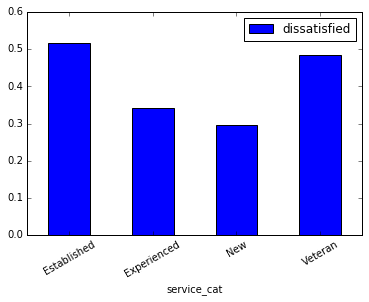

In [53]:
# Calculate the percentage of employees who resigned due to dissatisfaction in each category
dis_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

# Plot the results
%matplotlib inline
dis_pct.plot(kind='bar', rot=30)

From the initial analysis above, we can tentatively conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service. However, we need to handle the rest of the missing data to finalize our analysis.